In [28]:
import pandas as pd
import numpy as np

# Nicholas Sugijono / 2602064714
Link Video Penjelasan : https://drive.google.com/drive/folders/1XC1eGSMRsTDIV7SZnaIrRWeDn79G7XBV?usp=drive_link

# Importing Dataset

In [29]:
df=pd.read_csv('AMD.csv',parse_dates=['Date'],index_col=['Date'])

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [31]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [32]:
df.shape

(10098, 6)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


In [34]:
df_price=pd.DataFrame(df['Close']).rename(columns={'Close':'Price'})

In [35]:
df_price.head(10)

,Price
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667
1980-03-24,2.666667
1980-03-25,2.604167
1980-03-26,2.447917
1980-03-27,2.375000


In [36]:
df_price.head()

,Price
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


Text(0, 0.5, 'Apple Stock Price')

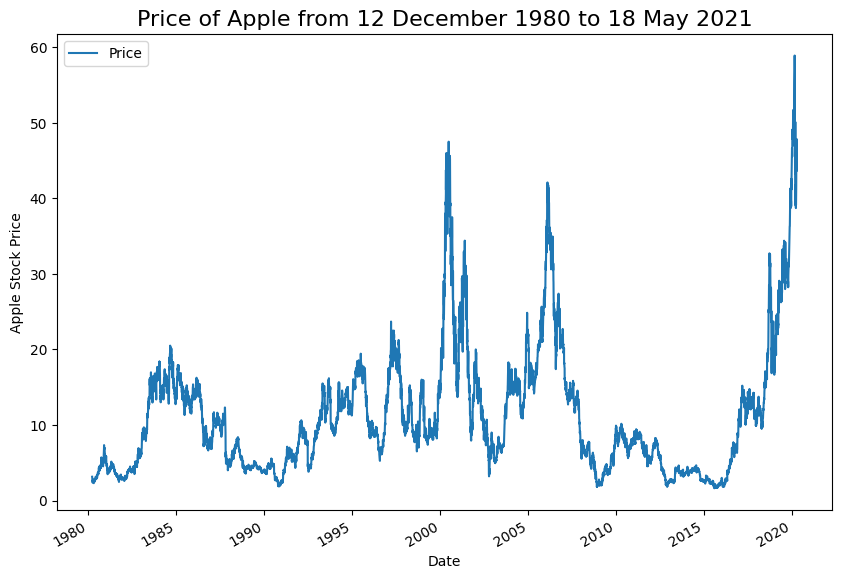

In [37]:
import matplotlib.pyplot as plt

df_price.plot(figsize=(10,7))
plt.title('Price of Apple from 12 December 1980 to 18 May 2021',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')

In [38]:
time_step=df_price.index.to_numpy()
price=df_price['Price'].values.astype('float32')
time_step[:10],price[:10]

(array(['1980-03-17T00:00:00.000000000', '1980-03-18T00:00:00.000000000',
        '1980-03-19T00:00:00.000000000', '1980-03-20T00:00:00.000000000',
        '1980-03-21T00:00:00.000000000', '1980-03-24T00:00:00.000000000',
        '1980-03-25T00:00:00.000000000', '1980-03-26T00:00:00.000000000',
        '1980-03-27T00:00:00.000000000', '1980-03-28T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([3.1458333, 3.03125  , 3.0416667, 3.0104167, 2.9166667, 2.6666667,
        2.6041667, 2.4479167, 2.375    , 2.5416667], dtype=float32))

In [39]:
train_size=int(0.8*len(price))
valid_size=int(0.1*len(price))
test_size=int(0.1*len(price))
print(train_size,valid_size,test_size)

8078 1009 1009


# Splitting

In [40]:
split_size_train = int(0.8 * len(price))
split_size_val = int(0.1 * len(price))

train_time, train_price = time_step[:split_size_train], price[:split_size_train]
val_time, val_price = time_step[split_size_train:split_size_train + split_size_val], price[split_size_train:split_size_train + split_size_val]
test_time, test_price = time_step[split_size_train + split_size_val:], price[split_size_train + split_size_val:]
len(train_time),len(test_time),len(train_price),len(test_price)

(8078, 1011, 8078, 1011)

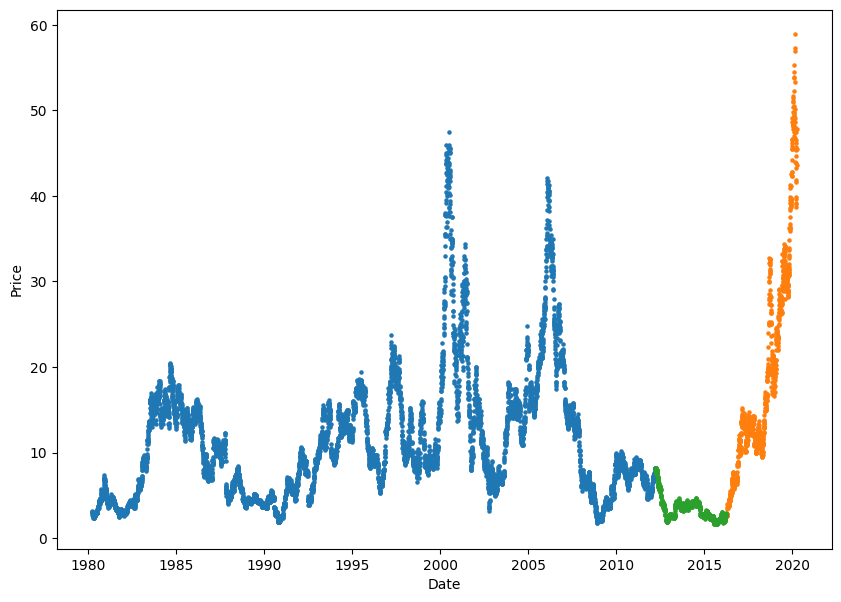

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(train_time, train_price, s=5, label="Train data")
plt.scatter(test_time, test_price, s=5, label="Test data")
plt.scatter(val_time, val_price, s=5, label="val data")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Creating Window Size and Horizon

In [42]:
import torch
def create_dataset(dataset, step):
    X, y = [], []
    for i in range(len(dataset)-step):
        feature = dataset[i:i+step]
        target = dataset[i+step:i+step+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [43]:
step = 5
X_train, y_train = create_dataset(train_price, step=step)
X_val, y_val = create_dataset(val_price, step=step)
X_test, y_test = create_dataset(test_price, step=step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([8073, 5]) torch.Size([8073, 1])
torch.Size([1006, 5]) torch.Size([1006, 1])


#  Scaling

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

scaler.fit(X_train)
y_scaler.fit(X_train.reshape(-1, 1))

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
y_train = y_scaler.transform(y_train.reshape(-1, 1))
y_val = y_scaler.transform(y_val.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

# Baseline Model

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units=50, activation='relu', input_shape=(5, 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


c:\Users\nsnic\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Fitting Baseline Model

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.callbacks import Callback

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Data generators
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)


class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            y_pred_train = self.model.predict(X_train)
            y_pred_val = self.model.predict(X_val)
            y_pred_test = self.model.predict(X_test)

            train_rmse = np.sqrt(MeanSquaredError()(y_train, y_pred_train).numpy())
            val_rmse = np.sqrt(MeanSquaredError()(y_val, y_pred_val).numpy())
            test_rmse = np.sqrt(MeanSquaredError()(y_test, y_pred_test).numpy())

            train_mae = MeanAbsoluteError()(y_train, y_pred_train).numpy()
            val_mae = MeanAbsoluteError()(y_val, y_pred_val).numpy()
            test_mae = MeanAbsoluteError()(y_test, y_pred_test).numpy()

            train_mape = MeanAbsolutePercentageError()(y_train, y_pred_train).numpy()
            val_mape = MeanAbsolutePercentageError()(y_val, y_pred_val).numpy()
            test_mape = MeanAbsolutePercentageError()(y_test, y_pred_test).numpy()

            print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, val RMSE {val_rmse:.4f}, test RMSE {test_rmse:.4f}")
            print(f"Epoch {epoch}: train MAE {train_mae:.4f}, val MAE {val_mae:.4f}, test MAE {test_mae:.4f}")
            print(f"Epoch {epoch}: train MAPE {train_mape:.4f}, val MAPE {val_mape:.4f}, test MAPE {test_mape:.4f}")

n_epochs = 100
history = model.fit(train_dataset, validation_data=val_dataset, epochs=n_epochs, callbacks=[MetricsCallback()])

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   -
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 0: train RMSE 0.0175, val RMSE 0.0038, test RMSE 0.0301
Epoch 0: train MAE 0.0108, val MAE 0.0027, test MAE 0.0177
Epoch 0: train MAPE 741.8600, val MAPE 22193.3145, test MAPE 5.1335
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0055 - val_loss: 1.4732e-05
Epoch 2/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8226e-04 - val_loss: 1.2055e-05
Epoch 3/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6492e-04 - val_loss: 3.9484e-05
Epoch 4/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3739e-04 - val_loss: 1.1594e-05
Epoch 5/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9949e-04 - val_loss: 3.7661e-05
Epoch 6/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9044e-04 - val_loss: 1.7648e-05
Epoch 7/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8658e-04 - val_loss: 9.5254e-06
Epoch 8/10

In [47]:
y_pred_test = model.predict(X_test)

y_test_unscaled = y_scaler.inverse_transform(y_test).flatten()
y_pred_test_unscaled = y_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

test_rmse = np.sqrt(MeanSquaredError()(y_test_unscaled, y_pred_test_unscaled).numpy())
test_mae = MeanAbsoluteError()(y_test_unscaled, y_pred_test_unscaled).numpy()
test_mape = MeanAbsolutePercentageError()(y_test_unscaled, y_pred_test_unscaled).numpy()

print(f"Final test RMSE: {test_rmse:.4f}")
print(f"Final test MAE: {test_mae:.4f}")
print(f"Final test MAPE: {test_mape:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Final test RMSE: 0.8970
Final test MAE: 0.5305
Final test MAPE: 2.8326


- RMSE: 0.8970: Model memiliki kesalahan prediksi rata-rata sekitar 0.897 unit dari nilai sebenarnya, menunjukkan akurasi yang sangat baik.
- MAE: 0.5305: Rata-rata kesalahan absolut adalah sekitar 0.531 unit dari nilai sebenarnya, yang sangat rendah dan menunjukkan bahwa prediksi model sangat dekat dengan nilai aktual.
- MAPE: 2.8326: Kesalahan prediksi model dalam bentuk persentase adalah sekitar 2.83% dari nilai sebenarnya, menunjukkan model yang sangat akurat dalam hal persentase kesalahan.

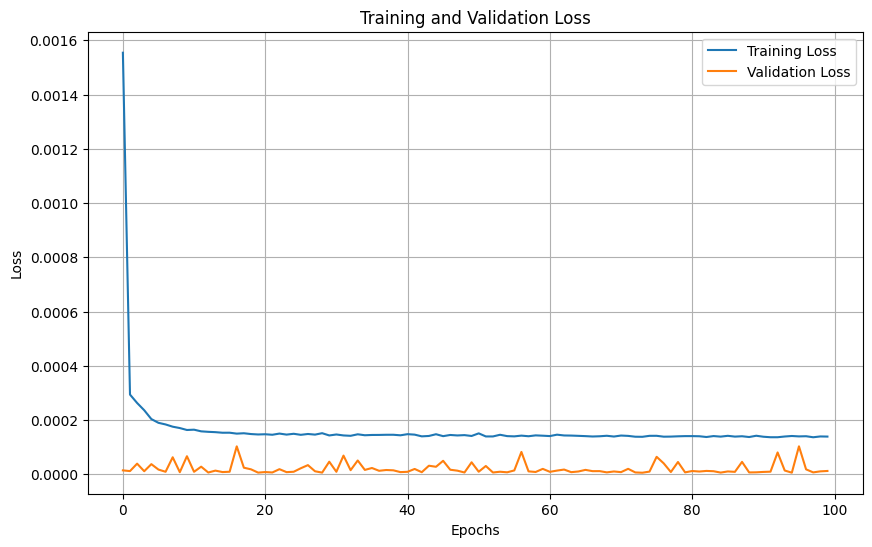

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
      Test Pred    Actual
0      0.024495  0.021007
1      0.023023  0.021882
2      0.023901  0.018381
3      0.020589  0.020569
4      0.022700  0.021007
...         ...       ...
1001   0.938181  1.000000
1002   1.002800  0.979869
1003   0.983731  1.007877
1004   1.019468  0.955799
1005   0.957604  0.915974

[1006 rows x 2 columns]


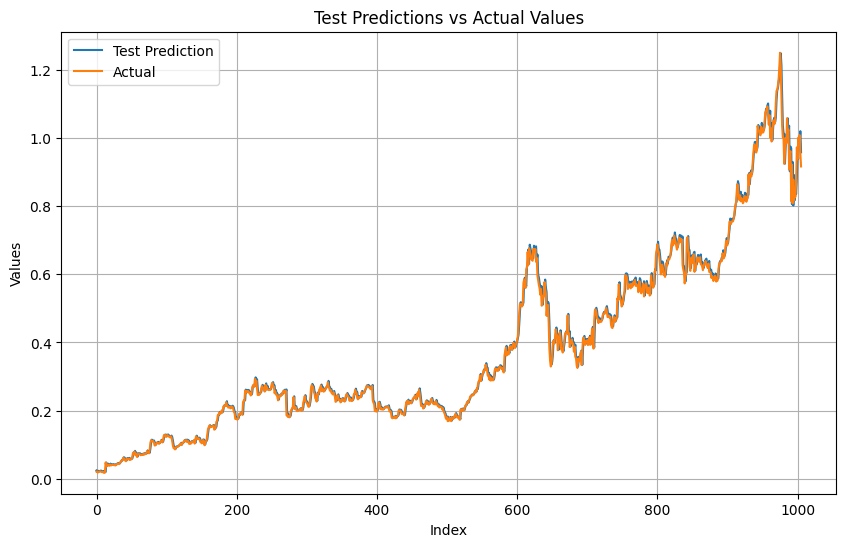

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.flatten()

test_res = pd.DataFrame(data={'Test Pred': y_pred, 'Actual': y_test})

print(test_res)

plt.figure(figsize=(10, 6))
plt.plot(test_res['Test Pred'], label='Test Prediction')
plt.plot(test_res['Actual'], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Test Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

model.add(LSTM(units=3, input_shape=(5, 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


c:\Users\nsnic\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 3)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

# Modified Model

In [146]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(5, )))

model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=150, activation='relu')))
    
model.add(tf.keras.layers.Dense(1, activation='linear'))

print(model.summary())

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_6 (Lambda)               │ (None, 1, 5)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 300)            │       187,200 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,501 (732.43 KB)

 Trainable params: 187,501 (732.43 KB)

 Non-trainable params: 0 (0.00 B)

None


- Lambda Layer: Lapisan ini menggunakan fungsi lambda untuk memperluas dimensi input.
- Bidirectional LSTM: Ini adalah lapisan LSTM yang berjalan di kedua arah (maju dan mundur) untuk menangkap informasi dari masa lalu dan masa depan dalam urutan data
- Dense Layer: Lapisan Dense atau fully connected dengan 1 unit (neuron).

In [147]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.callbacks import Callback

model.compile(optimizer=tf.keras.optimizers.SGD(0.05), loss=tf.keras.losses.MeanSquaredError())

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Data generators
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)


class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            y_pred_train = self.model.predict(X_train)
            y_pred_val = self.model.predict(X_val)
            y_pred_test = self.model.predict(X_test)

            train_rmse = np.sqrt(MeanSquaredError()(y_train, y_pred_train).numpy())
            val_rmse = np.sqrt(MeanSquaredError()(y_val, y_pred_val).numpy())
            test_rmse = np.sqrt(MeanSquaredError()(y_test, y_pred_test).numpy())

            train_mae = MeanAbsoluteError()(y_train, y_pred_train).numpy()
            val_mae = MeanAbsoluteError()(y_val, y_pred_val).numpy()
            test_mae = MeanAbsoluteError()(y_test, y_pred_test).numpy()

            train_mape = MeanAbsolutePercentageError()(y_train, y_pred_train).numpy()
            val_mape = MeanAbsolutePercentageError()(y_val, y_pred_val).numpy()
            test_mape = MeanAbsolutePercentageError()(y_test, y_pred_test).numpy()

            print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, val RMSE {val_rmse:.4f}, test RMSE {test_rmse:.4f}")
            print(f"Epoch {epoch}: train MAE {train_mae:.4f}, val MAE {val_mae:.4f}, test MAE {test_mae:.4f}")
            print(f"Epoch {epoch}: train MAPE {train_mape:.4f}, val MAPE {val_mape:.4f}, test MAPE {test_mape:.4f}")

# Melatih model
n_epochs = 50
history = model.fit(train_dataset, validation_data=val_dataset, epochs=n_epochs)




Epoch 1/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0150 - val_loss: 9.8875e-04
Epoch 2/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.8223e-04 - val_loss: 1.7618e-05
Epoch 3/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6860e-04 - val_loss: 2.3913e-05
Epoch 4/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7689e-04 - val_loss: 1.4016e-05
Epoch 5/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8389e-04 - val_loss: 3.6360e-05
Epoch 6/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7290e-04 - val_loss: 2.1970e-05
Epoch 7/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4738e-04 - val_loss: 4.7093e-05
Epoch 8/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5396e-04 - val_loss: 2.3212e-05
Epoch 9/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4502e-04 - val_loss: 1.5481e-05
Epoch 10/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6246e-04 - val_loss: 3.1999e-05
Epoch 11/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 

In [148]:
y_pred_test = model.predict(X_test)

y_test_unscaled = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_test_unscaled = y_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

test_rmse = np.sqrt(MeanSquaredError()(y_test_unscaled, y_pred_test_unscaled).numpy())
test_mae = MeanAbsoluteError()(y_test_unscaled, y_pred_test_unscaled).numpy()
test_mape = MeanAbsolutePercentageError()(y_test_unscaled, y_pred_test_unscaled).numpy()

print(f"Final test RMSE: {test_rmse:.4f}")
print(f"Final test MAE: {test_mae:.4f}")
print(f"Final test MAPE: {test_mape:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Final test RMSE: 1.0852
Final test MAE: 0.6526
Final test MAPE: 3.5273


- RMSE: 1.0852: Model memiliki kesalahan prediksi rata-rata sekitar 1.085 unit dari nilai sebenarnya, yang menunjukkan bahwa prediksi model cukup akurat.
- MAE: 0.6526: Rata-rata kesalahan absolut adalah sekitar 0.653 unit dari nilai sebenarnya, menunjukkan bahwa prediksi model cukup dekat dengan nilai aktual.
- MAPE: 3.5273: Kesalahan prediksi model dalam bentuk persentase adalah sekitar 3.53% dari nilai sebenarnya, menunjukkan bahwa model memiliki akurasi yang baik dalam hal persentase kesalahan.

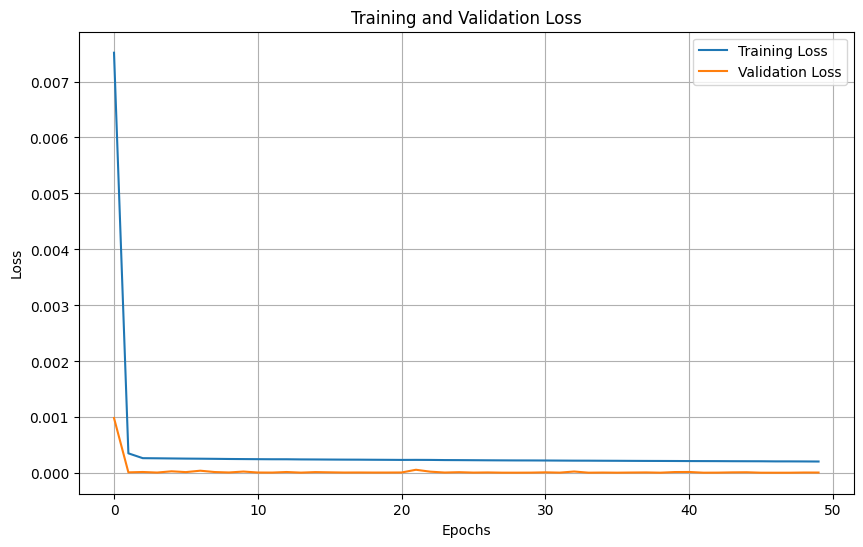

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Loss yang rendah dan stabil menunjukkan bahwa model telah mempelajari pola-pola dasar dari data dengan baik.
Perbedaan minimal antara loss pelatihan dan validasi mengindikasikan bahwa model menggeneralisasi dengan baik ke data baru, yang merupakan indikator baik dari kekokohan model.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
      Test Pred    Actual
0      0.024035  0.021007
1      0.023393  0.021882
2      0.023270  0.018381
3      0.021921  0.020569
4      0.021846  0.021007
...         ...       ...
1001   0.915673  1.000000
1002   0.955353  0.979869
1003   0.974610  1.007877
1004   0.998168  0.955799
1005   0.986707  0.915974

[1006 rows x 2 columns]


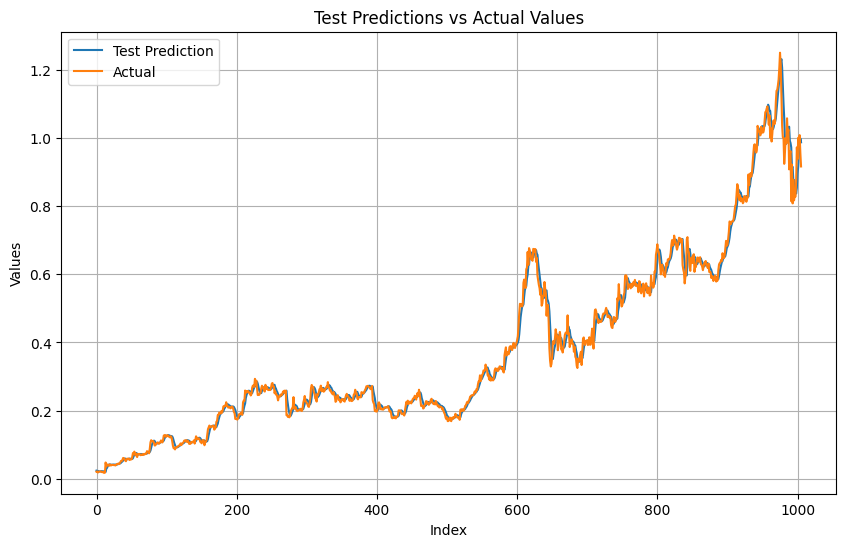

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.flatten()

test_res = pd.DataFrame(data={'Test Pred': y_pred, 'Actual': y_test})

print(test_res)

plt.figure(figsize=(10, 6))
plt.plot(test_res['Test Pred'], label='Test Prediction')
plt.plot(test_res['Actual'], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Test Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


Grafik ini menunjukkan bahwa model yang digunakan memiliki kemampuan yang baik dalam memprediksi nilai pada data uji, dengan prediksi yang sangat dekat dengan nilai aktual. Ini menunjukkan bahwa model memiliki generalisasi yang baik dan mampu menangkap pola dalam data dengan akurasi tinggi.